In [1]:
from utils import read_graph_from_json, update_attributes, get_k_L_U
states = ['TN']
district_types = ['SH']
level = 'block'

****************************************
Starting TN SH
****************************************

Starting TN with k = 99 and deviation = 0.1
Thus, we have L = 66317 and U = 73296
Updated to L = 66445 and U = 73358.
Successfully processed plan with 60 whole counties.
Set parameter Username
Academic license - for non-commercial use only - expires 2026-04-01
Dropped 1 and reduced from {'47117', '47103', '47031', '47003', '47051', '47127'} to ['47117', '47103', '47031', '47003', '47051'].
Dropped 2 and reduced from {'47113', '47131', '47075', '47053', '47097', '47167', '47033', '47045', '47047', '47017', '47183'} to ['47113', '47131', '47053', '47097', '47033', '47045', '47047', '47017', '47183'].
Adding non-dominated, minimal constraints:
['47165']
['47179']
['47187']
['47141']
['47117', '47103', '47031', '47003', '47051']
['47009']
['47119']
['47011']
['47155']
['47189']
['47163']
['47125']
['47113', '47131', '47053', '47097', '47033', '47045', '47047', '47017', '47183']
['47029', '4705

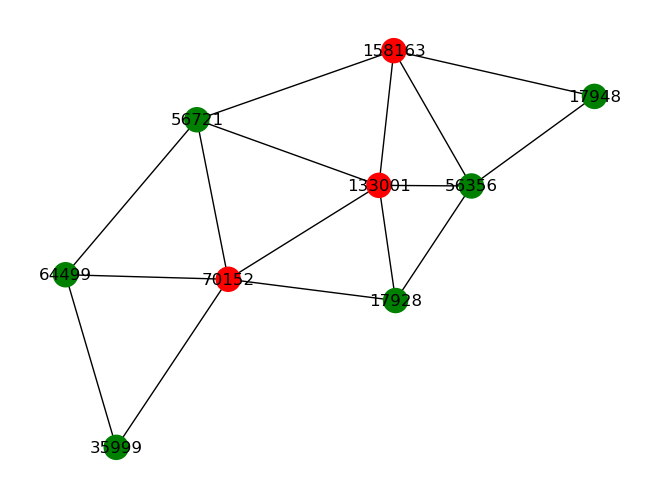

Seeking 1 districts for cluster #7/25 over n = 4372 vertices.
This cluster has counties {'47095', '47131', '47183'} of which {'47095', '47131', '47183'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 70694.0.
Seeking 1 districts for cluster #8/25 over n = 4474 vertices.
This cluster has counties {'47161', '47005', '47083', '47079'} of which {'47161', '47005', '47083', '47079'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 70003.0.
Seeking 3 districts for cluster #9/25 over n = 7323 vertices.
This cluster has counties {'47129', '47173', '47145', '47067', '47001', '47057'} of which {'47129', '47173', '47145', '47067', '47057'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 67184.33.
First, trying to draw districts at tract-level where n = 54.
Trying tract-level instance with n = 25.
Trying DAG model, with root geoids = ['47173', '47145', '47001021001']
Seeking 1 districts for cluster #10/25 over n = 1568 vertices.
This cluster has counties

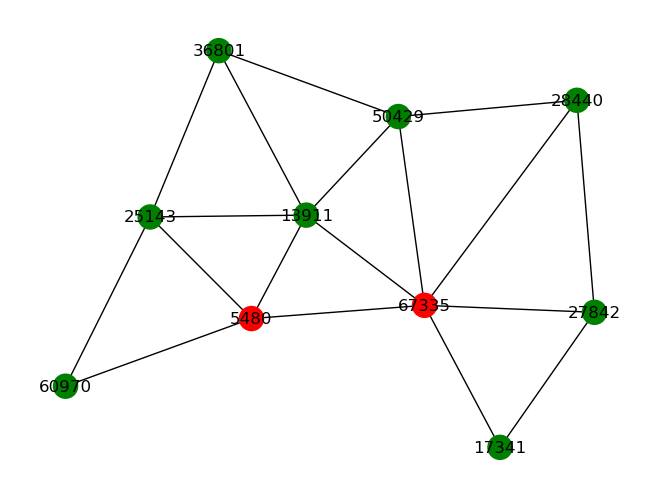

Seeking 2 districts for cluster #19/25 over n = 5047 vertices.
This cluster has counties {'47015', '47031', '47003', '47061'} of which {'47015', '47003', '47061'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 68080.5.
First, trying to draw districts at tract-level where n = 35.
Trying tract-level instance with n = 20.
Trying DAG model, with root geoids = ['47031970401', '47031970202']
Trying a,b-separator model.
Tract-level attempt failed. Returning to original graph (block-level).
Trying block-level instance with n = 2018.
Trying block-level instance with n = 431.
Trying DAG model, with root geoids = ['470319708031007', '47031']
Trying a,b-separator model.
Trying DAG model, with root geoids = ['470319708031007', '470319702021004']
Trying a,b-separator model.
Failed to detail cluster = ['47031', '47061', '47003', '47015']. Keeping as multi-district of size = 2.
Compare [L, U] = [66445,73358] to p(cluster)/size = 68080.5.


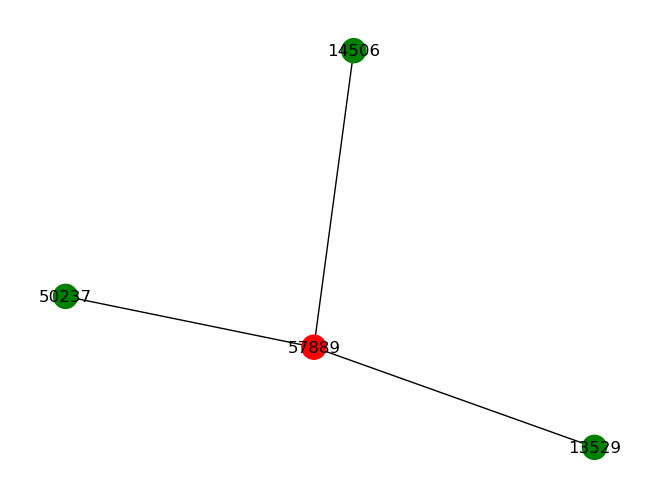

Seeking 3 districts for cluster #20/25 over n = 3333 vertices.
This cluster has counties {'47169', '47165'} of which {'47169'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 69298.67.
Used cached districts.
Seeking 2 districts for cluster #21/25 over n = 4290 vertices.
This cluster has counties {'47117', '47119'} of which {'47117'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 67646.0.
First, trying to draw districts at tract-level where n = 27.
Trying tract-level instance with n = 22.
Trying DAG model, with root geoids = ['47119010802', '47119010302']
Seeking 1 districts for cluster #22/25 over n = 4939 vertices.
This cluster has counties {'47135', '47039', '47071', '47081'} of which {'47135', '47039', '47071', '47081'} are whole.
Compare [L,U] = [66445, 73358] to p(cluster)/size = 71557.0.
Seeking 1 districts for cluster #23/25 over n = 3616 vertices.
This cluster has counties {'47055', '47127', '47103'} of which {'47055', '47127', '47103'} are whole.

In [2]:
from main import solve_max_whole
from utils import import_from_baf, export_to_baf

results = dict()
filepath = 'C:\\districting-data-2020-conn\\'
filepath2 = 'case-study-plans\\'

for district_type in district_types:
    for state in states:
        print(f"{'*'*40}\nStarting {state} {district_type}\n{'*'*40}\n")    
        filename = state + '_' + level + '.json'
        G = read_graph_from_json( filepath + filename )
        update_attributes(G, state)
        (k, L, U) = get_k_L_U(G, state, district_type)
        if k <= 1:
            print("Skipping because k <= 1.")
            continue
    
        # get warm start plan (statewide)
        filename = 'TN 2022 State House.baf'
        statewide_plan = import_from_baf(G, filepath2, filename)

        # redefine L and U to match the enacted plan
        populations = [ sum( G.nodes[i]['TOTPOP'] for i in district ) for district in statewide_plan ]
        L = min( populations )
        U = max( populations )
        print(f"Updated to L = {L} and U = {U}.")

        # extract "urban" districts from these counties:
        #   Davidson (47037), Shelby (47157), Hamilton (47065), Knox (47093), Rutherford (47149)
        # AND, create incumbent plan for rural:=non-urban counties:
        urban_fips = [ '47037', '47157', '47065', '47093', '47149' ]
        
        urban_districts = list()
        rural_districts = list()

        # the other VRA district (in rural counties) crosses:
        #    Hardeman (47069), Madison (47113), Haywood (47075)
        other_VRA_fips = ['47069', '47113', '47075']
        
        for district in statewide_plan:
            v = district[0]
            if G.nodes[v]['GEOID20'][0:5] in urban_fips:
                urban_districts.append( district )
            elif { G.nodes[i]['GEOID20'][0:5] for i in district } == set(other_VRA_fips):
                urban_districts.append( district )
            else:
                rural_districts.append( district )
        
        # solve max whole
        vertices = [ v for district in rural_districts for v in district ]
        results[state, district_type] = solve_max_whole(G.subgraph(vertices), L, U, k-len(urban_districts), rural_districts, verbose=False, must_split_fips=other_VRA_fips)

        # export incumbent plan
        plan = results[state, district_type]['incumbent_plan']
        plan += urban_districts
        ga = { G.nodes[i]['GEOID20'] : j for j in range(len(plan)) for i in plan[j] }
        gap = results[state, district_type]['UB'] - results[state, district_type]['LB']
        if gap == 0:
            fn = "case_study3.baf"
        else:
            fn = "case_study3" + '_' + str(gap) + '.baf'
        export_to_baf(G, geoid_assignment=ga, outfilename=fn)
        
        # export partial plans?
        if gap > 0:
            counter = 0
            for rural_districts in results[state, district_type]['incomplete_plans']:
                plan = urban_districts + rural_districts 
                counter += 1
                ga = { G.nodes[i]['GEOID20'] : j for j in range(len(plan)) for i in plan[j] }
                fn = "case_study3_incomplete_plan_" + str(counter) + ".baf"
                export_to_baf(G, geoid_assignment=ga, outfilename=fn)
    